## Homework Option 2 - Prediction of Loan Fallout
Mengheng Xue

### data preprocessing

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
 
# Importing the dataset
df = pd.read_csv('Lesson5_HW2_Loan_FallOut_Prediction.csv') 

# Taking care of missing data
# we observe the missing credit score data are all for loan fallout customers, so we use the average of credit scores with FALLOUT_FLAG = 1
# for missing credit score data
df['BORROWER_CREDIT_SCORE'].fillna(df.loc[lambda df: df.FALLOUT_FLAG == 1, :]['BORROWER_CREDIT_SCORE'].mean(), inplace=True)
df['VETERAN'].fillna(df['VETERAN'].value_counts().index[0], inplace=True) # fill in CETERAN missing values with mode 
df['MARITAL'].fillna(df['MARITAL'].value_counts().index[0], inplace=True) # fill in MARITAL missing values with mode 
df = df.replace('Not provided by phone/mail app', df['GENDER'].value_counts().index[0], regex=True) # replace missing GENDER with mode 

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
for i in [2, 3, 4, 7, 8, 9, 10, 11, 12, 13]: 
    X[:, i] = labelencoder_X.fit_transform(X[:, i]) 

# dummy encoding
onehotencoder = OneHotEncoder(categorical_features = [3]) # martial status
X = onehotencoder.fit_transform(X).toarray()
X = X[:,1:] # avoid dummy variable trap
    

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\mengh\Anaconda3\envs\python35\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


### Naive Bayes

In [2]:
# ==================Naive Bayes ====================
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# Predicting the Test set results
y_pred_nb = classifier_nb.predict(X_test)

### Decison Tree 

In [3]:
# ===========================Decison Tree ====================
# decison tree 
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

### ANN

In [4]:
# ===================ANN=======================
# Importing the Keras libraries and packages
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

def create_network():
    # Initialising the ANN
    classifier_nn = Sequential()

    # Adding the input layer and the first hidden layer
    classifier_nn.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))

    # Adding the second hidden layer
    classifier_nn.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier_nn.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    classifier_nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  
    # Return compiled network
    return classifier_nn

# Wrap Keras model so it can be used by scikit-learn
classifier_nn = KerasClassifier(build_fn=create_network, 
                                 epochs=100, 
                                 batch_size=10, 
                                 verbose=1)
# Fitting the ANN to the Training set
classifier_nn.fit(X_train, y_train)

# Predicting the Test set results
y_pred_nn = classifier_nn.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5)

Using TensorFlow backend.


Epoch 1/100
43537/43537 [==============================] - 4s 87us/step - loss: 0.5511 - acc: 0.7290
Epoch 2/100
43537/43537 [==============================] - 4s 85us/step - loss: 0.4390 - acc: 0.8198
Epoch 3/100
43537/43537 [==============================] - 4s 86us/step - loss: 0.4130 - acc: 0.8351
Epoch 4/100
43537/43537 [==============================] - 4s 84us/step - loss: 0.4037 - acc: 0.8390
Epoch 5/100
43537/43537 [==============================] - 4s 87us/step - loss: 0.3951 - acc: 0.8411
Epoch 6/100
43537/43537 [==============================] - 4s 82us/step - loss: 0.3911 - acc: 0.8416
Epoch 7/100
43537/43537 [==============================] - 3s 78us/step - loss: 0.3895 - acc: 0.8425
Epoch 8/100
43537/43537 [==============================] - 3s 78us/step - loss: 0.3881 - acc: 0.8414
Epoch 9/100
43537/43537 [==============================] - 3s 72us/step - loss: 0.3858 - acc: 0.8420
Epoch 10/100
43537/43537 [==============================] - 3s 74us/step - loss: 0.3891 - a

Epoch 81/100
43537/43537 [==============================] - 3s 69us/step - loss: 0.3668 - acc: 0.8565
Epoch 82/100
43537/43537 [==============================] - 3s 69us/step - loss: 0.3678 - acc: 0.8554
Epoch 83/100
43537/43537 [==============================] - 4s 87us/step - loss: 0.3665 - acc: 0.8558
Epoch 84/100
43537/43537 [==============================] - 3s 68us/step - loss: 0.3668 - acc: 0.8554
Epoch 85/100
43537/43537 [==============================] - 3s 67us/step - loss: 0.3673 - acc: 0.8552
Epoch 86/100
43537/43537 [==============================] - 3s 68us/step - loss: 0.3687 - acc: 0.8537
Epoch 87/100
43537/43537 [==============================] - 3s 68us/step - loss: 0.3672 - acc: 0.8561
Epoch 88/100
43537/43537 [==============================] - 3s 69us/step - loss: 0.3663 - acc: 0.8569
Epoch 89/100
43537/43537 [==============================] - 3s 70us/step - loss: 0.3679 - acc: 0.8547
Epoch 90/100
43537/43537 [==============================] - 3s 67us/step - loss: 0

### SVM

In [5]:
#==============SVM======================
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', probability=True,verbose=True, random_state = 0)
classifier_svm.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)

[LibSVM]

### Logistic Regression

In [6]:
#============logistic regression===============
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lr = classifier_lr.predict(X_test)

### compare ROC curves

14513/14513 [==============================] - 0s 29us/step


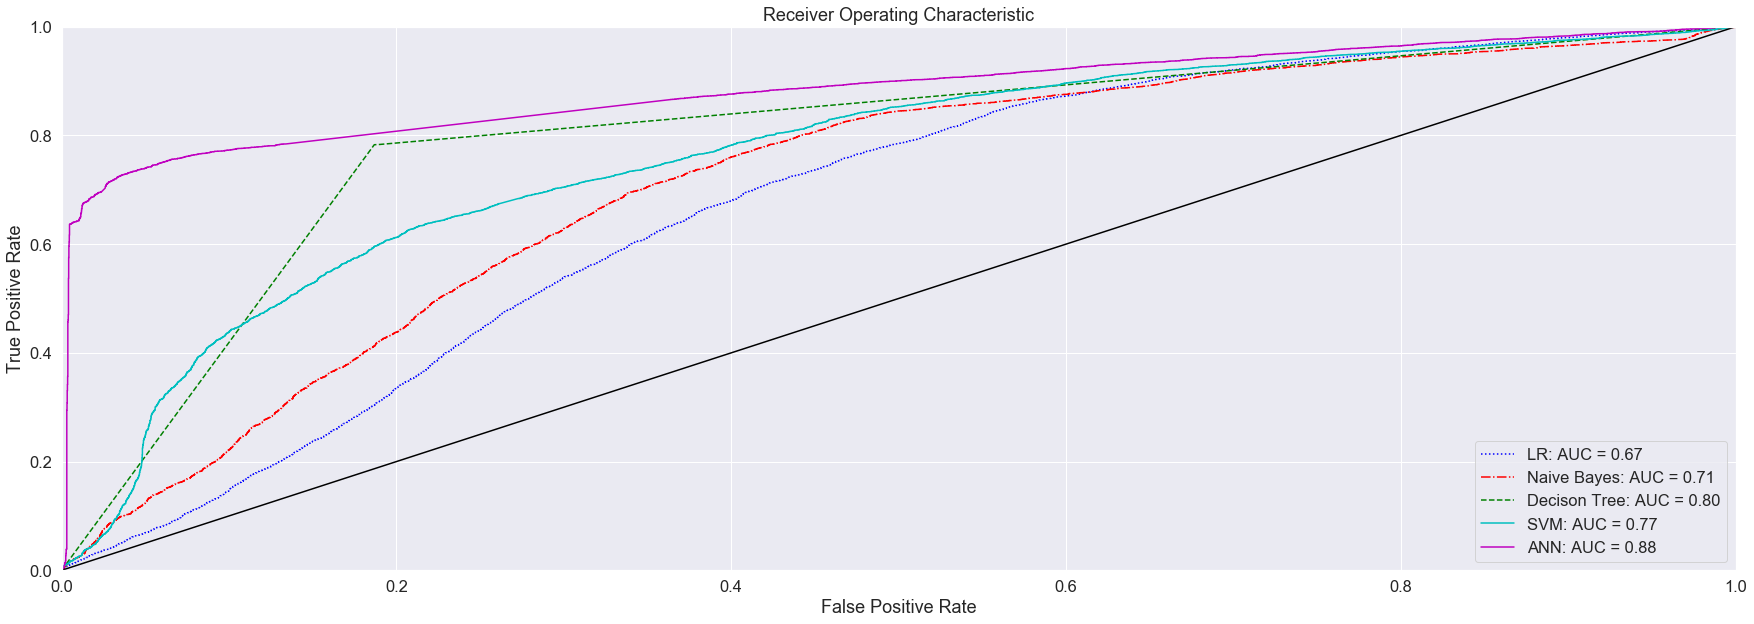

In [7]:
# ====================plot setting ===============
pd.options.display.max_colwidth = 60

plt.rcParams['figure.figsize'] = (30, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.5)

# ===================compare ROC curves===================== 
y_prob_lr = classifier_lr.predict_proba(X_test)[:, 1]
y_prob_nb = classifier_nb.predict_proba(X_test)[:, 1]
y_prob_dt = classifier_dt.predict_proba(X_test)[:, 1]
y_prob_svm = classifier_svm.predict_proba(X_test)[:, 1]
y_prob_nn = classifier_nn.predict_proba(X_test)[:, 1]
# Compute ROC curve AUC
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr, pos_label=None)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb, pos_label=None)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt, pos_label=None)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm, pos_label=None)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn, pos_label=None)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b:', label = 'LR: AUC = %0.2f' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, 'r-.', label = 'Naive Bayes: AUC = %0.2f' % roc_auc_nb)
plt.plot(fpr_dt, tpr_dt, 'g--', label = 'Decison Tree: AUC = %0.2f' % roc_auc_dt)
plt.plot(fpr_svm, tpr_svm, 'c-', label = 'SVM: AUC = %0.2f' % roc_auc_svm)
plt.plot(fpr_nn, tpr_nn, 'm', label = 'ANN: AUC = %0.2f' % roc_auc_nn)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### compare confustion matrix

In [8]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_nn = confusion_matrix(y_test, y_pred_nn)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("LR confusion matrix")
print('act\pred | class-0  class-1')
print('----------------------------------')
print('class-0  |{0:8d} {1:8d}'.format(cm_lr[0, 0], cm_lr[0, 1]))
print('class-1  |{0:8d} {1:8d}'.format(cm_lr[1, 0], cm_lr[1, 1]))

print("\nNB confusion matrix")
print('act\pred | class-0  class-1')
print('----------------------------------')
print('class-0  |{0:8d} {1:8d}'.format(cm_nb[0, 0], cm_nb[0, 1]))
print('class-1  |{0:8d} {1:8d}'.format(cm_nb[1, 0], cm_nb[1, 1]))


print("\nSVM confusion matrix")
print('act\pred | class-0  class-1')
print('----------------------------------')
print('class-0  |{0:8d} {1:8d}'.format(cm_svm[0, 0], cm_svm[0, 1]))
print('class-1  |{0:8d} {1:8d}'.format(cm_svm[1, 0], cm_svm[1, 1]))

print("\nANN confusion matrix")
print('act\pred | class-0  class-1')
print('----------------------------------')
print('class-0  |{0:8d} {1:8d}'.format(cm_nn[0, 0], cm_nn[0, 1]))
print('class-1  |{0:8d} {1:8d}'.format(cm_nn[1, 0], cm_nn[1, 1]))

print("\nDecison Tree confusion matrix")
print('act\pred | class-0  class-1')
print('----------------------------------')
print('class-0  |{0:8d} {1:8d}'.format(cm_dt[0, 0], cm_dt[0, 1]))
print('class-1  |{0:8d} {1:8d}'.format(cm_dt[1, 0], cm_dt[1, 1]))

LR confusion matrix
act\pred | class-0  class-1
----------------------------------
class-0  |    6035     1979
class-1  |    3659     2840

NB confusion matrix
act\pred | class-0  class-1
----------------------------------
class-0  |    7159      855
class-1  |    4920     1579

SVM confusion matrix
act\pred | class-0  class-1
----------------------------------
class-0  |    5662     2352
class-1  |    1943     4556

ANN confusion matrix
act\pred | class-0  class-1
----------------------------------
class-0  |    7721      293
class-1  |    1770     4729

Decison Tree confusion matrix
act\pred | class-0  class-1
----------------------------------
class-0  |    6517     1497
class-1  |    1411     5088


### commpare ROC, Precision, Recall, and F-Score

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score
prec_lr = precision_score(y_test, y_pred_lr)
prec_nb = precision_score(y_test, y_pred_nb)
prec_svm = precision_score(y_test, y_pred_svm)
prec_dt = precision_score(y_test, y_pred_dt)
prec_nn = precision_score(y_test, y_pred_nn)

rec_lr = recall_score(y_test, y_pred_lr)
rec_nb = recall_score(y_test, y_pred_nb)
rec_svm = recall_score(y_test, y_pred_svm)
rec_dt = recall_score(y_test, y_pred_dt)
rec_nn = recall_score(y_test, y_pred_nn)

f1_lr = f1_score(y_test, y_pred_lr)
f1_dt = f1_score(y_test, y_pred_dt)
f1_nb = f1_score(y_test, y_pred_nb)
f1_svm = f1_score(y_test, y_pred_svm)
f1_nn = f1_score(y_test, y_pred_nn)



print("                       LR         NB        SVM       ANN      DT")
print("------------------------------------------------------------------------")
print("precision     {0:8.3f}  {1:8.3f} {2:8.3f}  {3:8.3f}  {4:8.3f}".format(prec_lr, prec_nb, prec_svm, prec_nn, prec_dt))
print("recall           {0:8.3f}  {1:8.3f} {2:8.3f}  {3:8.3f}  {4:8.3f}".format(rec_lr, rec_nb, rec_svm, rec_nn, rec_dt))
print("F1               {0:8.3f}  {1:8.3f} {2:8.3f}  {3:8.3f}  {4:8.3f}".format(f1_lr, f1_nb, f1_svm, f1_nn, f1_dt))


                       LR         NB        SVM       ANN      DT
------------------------------------------------------------------------
precision        0.589     0.649    0.660     0.942     0.773
recall              0.437     0.243    0.701     0.728     0.783
F1                  0.502     0.354    0.680     0.821     0.778


### Cross Validation

In [10]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_lr = cross_val_score(estimator = classifier_lr, X = X_train, y = y_train, cv = 3)
accuracies_nb = cross_val_score(estimator = classifier_nb, X = X_train, y = y_train, cv = 3)
accuracies_svm = cross_val_score(estimator = classifier_svm, X = X_train, y = y_train, cv = 3)
accuracies_nn = cross_val_score(estimator = classifier_nn, X = X_train, y = y_train, scoring="accuracy", cv = 3)
accuracies_dt = cross_val_score(estimator = classifier_dt, X = X_train, y = y_train, cv = 3)

print("                               LR         NB        SVM       ANN      DT")
print("------------------------------------------------------------------------")
print("cv score mean     {0:8.3f}  {1:8.3f} {2:8.3f}  {3:8.3f}  {4:8.3f}".format(accuracies_lr.mean(), 
                                                                                 accuracies_nb.mean(), accuracies_svm.mean(), accuracies_nn.mean(), accuracies_dt.mean()))
print("cv score std         {0:8.3f}  {1:8.3f} {2:8.3f}  {3:8.3f}  {4:8.3f}".format(accuracies_lr.std(),
                                                                                     accuracies_nb.std(), accuracies_svm.std(), accuracies_nn.std(), accuracies_dt.std()))


[LibSVM][LibSVM][LibSVM]Epoch 1/100
29024/29024 [==============================] - 2s 86us/step - loss: 0.5900 - acc: 0.6790
Epoch 2/100
29024/29024 [==============================] - 2s 72us/step - loss: 0.5018 - acc: 0.7819
Epoch 3/100
29024/29024 [==============================] - 2s 73us/step - loss: 0.4412 - acc: 0.8173
Epoch 4/100
29024/29024 [==============================] - 2s 77us/step - loss: 0.4157 - acc: 0.8283
Epoch 5/100
29024/29024 [==============================] - 2s 69us/step - loss: 0.4046 - acc: 0.8344
Epoch 6/100
29024/29024 [==============================] - 2s 76us/step - loss: 0.3972 - acc: 0.8376
Epoch 7/100
29024/29024 [==============================] - 2s 75us/step - loss: 0.3921 - acc: 0.8405
Epoch 8/100
29024/29024 [==============================] - 2s 73us/step - loss: 0.3884 - acc: 0.8422
Epoch 9/100
29024/29024 [==============================] - 2s 76us/step - loss: 0.3851 - acc: 0.8438
Epoch 10/100
29024/29024 [==============================] - 2s 74us

29025/29025 [==============================] - 2s 72us/step - loss: 0.3572 - acc: 0.8543
Epoch 61/100
29025/29025 [==============================] - 2s 76us/step - loss: 0.3570 - acc: 0.8548
Epoch 62/100
29025/29025 [==============================] - 2s 74us/step - loss: 0.3563 - acc: 0.8551
Epoch 63/100
29025/29025 [==============================] - 2s 79us/step - loss: 0.3563 - acc: 0.8552
Epoch 64/100
29025/29025 [==============================] - 2s 79us/step - loss: 0.3571 - acc: 0.8541
Epoch 65/100
29025/29025 [==============================] - 2s 75us/step - loss: 0.3560 - acc: 0.8548
Epoch 66/100
29025/29025 [==============================] - 2s 78us/step - loss: 0.3561 - acc: 0.8542
Epoch 67/100
29025/29025 [==============================] - 2s 75us/step - loss: 0.3573 - acc: 0.8533
Epoch 68/100
29025/29025 [==============================] - 2s 77us/step - loss: 0.3559 - acc: 0.8546
Epoch 69/100
29025/29025 [==============================] - 2s 73us/step - loss: 0.3556 - acc: 

### Conclusion

We use five classification models, i.e., Naïve Bayesian, Decision Tree, SVM, Logistic Regression, and ANN to predict loan fallout. We can see that in this case,
+ ANN has much greater prediction ability than the other models. If we keep tuning the parameters, we believe the performance can be improved even better.
+ The second best is the Decision Tree. It is simple, but it has unexpected powerful prediction ability (AUC = 0.80).
+ The third is the SVM. We use a linear kernel first, but its performance is really bad. Then we adopt rbf kernel and achieve good performance due to the problem is nonlinear.
+ We would say that LR and NB performances are really similar based on ROC curves and cross-validation scores. We could see from the cross-validation score. (LR = 0.606 and NB = 0.603)
+ Also, we find that feature engineering is really important for classification problems. Good feature selection and missing data handling may improve the model performance extremely.







